In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pathlib import Path

np.random.seed(42)

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 2)
pd.reset_option('display.max_columns')


In [2]:
datapath = Path() / "data" / "lifesat"
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [3]:
oecd_bli.head(10)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
5,DNK,Denmark,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.2,NaN,NaN
6,FIN,Finland,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
7,FRA,France,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,7.6,NaN,NaN
8,DEU,Germany,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
9,GRC,Greece,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,29.8,NaN,NaN


In [4]:
gdp_per_capita

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.78
1,Afghanistan,AFG,2003,1235.81
2,Afghanistan,AFG,2004,1200.28
3,Afghanistan,AFG,2005,1286.79
4,Afghanistan,AFG,2006,1315.79
5,Afghanistan,AFG,2007,1460.83
6,Afghanistan,AFG,2008,1484.11
7,Afghanistan,AFG,2009,1758.90
8,Afghanistan,AFG,2010,1957.03
9,Afghanistan,AFG,2011,1904.56


In [5]:
gdp_per_capita_2020 = gdp_per_capita[gdp_per_capita["Year"] == 2020]
gdp_per_capita_2020 = gdp_per_capita_2020.rename(
    columns={"GDP per capita, PPP (constant 2017 international $)": "GDP per capita (USD)"}
)
gdp_per_capita_2020.head(10)

,Entity,Code,Year,GDP per capita (USD)
18,Afghanistan,AFG,2020,1978.96
49,Africa Eastern and Southern,NaN,2020,3387.59
80,Africa Western and Central,NaN,2020,4003.16
111,Albania,ALB,2020,13295.41
142,Algeria,DZA,2020,10681.68
173,Angola,AGO,2020,6198.08
204,Antigua and Barbuda,ATG,2020,17956.32
235,Arab World,NaN,2020,13753.71
266,Argentina,ARG,2020,19686.52
297,Armenia,ARM,2020,12592.64


In [6]:
oecd_bli["Indicator"].value_counts()

Indicator
Student skills                                       200
Self-reported health                                 182
Quality of support network                           168
Life satisfaction                                    168
Labour market insecurity                             162
Homicide rate                                        123
Feeling safe walking alone at night                  123
Life expectancy                                      123
Water quality                                        123
Employment rate                                      123
Years in education                                   120
Educational attainment                               120
Long-term unemployment rate                          117
Employees working very long hours                    117
Time devoted to leisure and personal care             69
Air pollution                                         41
Voter turnout                                         41
Stakeholder engagemen

In [7]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [8]:
oecd_bli = oecd_bli.reset_index()
oecd_bli

Indicator,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
7,Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
8,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5
9,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7


In [9]:
gdp_per_capita_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 18 to 7108
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                224 non-null    object 
 1   Code                  179 non-null    object 
 2   Year                  224 non-null    int64  
 3   GDP per capita (USD)  224 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.8+ KB


In [10]:
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            41 non-null     object 
 1   Air pollution                                      41 non-null     float64
 2   Dwellings without basic facilities                 38 non-null     float64
 3   Educational attainment                             40 non-null     float64
 4   Employees working very long hours                  39 non-null     float64
 5   Employment rate                                    41 non-null     float64
 6   Feeling safe walking alone at night                41 non-null     float64
 7   Homicide rate                                      41 non-null     float64
 8   Household net adjusted disposable income           30 non-null     float64
 9   Household ne

In [11]:
full_country_stats = oecd_bli.merge(
    gdp_per_capita_2020, left_on="Country", right_on="Entity", how="inner")
full_country_stats

,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Entity,Code,Year,GDP per capita (USD)
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,2.7,502.0,14.35,91.0,93.0,21.0,Australia,AUS,2020,48697.84
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,1.3,492.0,14.55,80.0,92.0,17.0,Austria,AUT,2020,51935.60
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,2.0,503.0,15.70,89.0,84.0,19.3,Belgium,BEL,2020,48210.03
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,2.2,395.0,NaN,79.0,73.0,16.2,Brazil,BRA,2020,14063.98
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,2.9,523.0,14.56,68.0,91.0,17.3,Canada,CAN,2020,45856.63
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,1.3,443.0,NaN,47.0,71.0,17.5,Chile,CHL,2020,23324.52
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,1.4,410.0,NaN,53.0,75.0,14.1,Colombia,COL,2020,13441.49
7,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,2.0,504.0,15.87,86.0,95.0,19.5,Denmark,DNK,2020,55938.21
8,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,2.7,524.0,14.90,64.0,84.0,17.7,Estonia,EST,2020,35638.42
9,Finland,6.0,0.5,88.0,3.81,70.0,85.1,1.3,29943.0,200827.0,...,2.2,523.0,15.17,67.0,95.0,19.8,Finland,FIN,2020,47260.80


In [12]:
full_country_stats = full_country_stats[["Country", "Life satisfaction", "GDP per capita (USD)"]]
full_country_stats = full_country_stats.sort_values(by="GDP per capita (USD)")
full_country_stats

,Country,Life satisfaction,GDP per capita (USD)
29,South Africa,4.7,11466.19
6,Colombia,6.3,13441.49
3,Brazil,6.4,14063.98
21,Mexico,6.5,17887.75
5,Chile,6.5,23324.52
27,Russia,5.8,26456.39
12,Greece,5.4,27287.08
33,Turkey,5.5,28384.99
18,Latvia,5.9,29932.49
13,Hungary,5.6,31007.77


In [13]:
full_country_stats.to_csv(datapath / "lifesat_full.csv", index=False)

In [14]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats["GDP per capita (USD)"] >= min_gdp) & (full_country_stats["GDP per capita (USD)"] <= max_gdp)]
country_stats.to_csv(datapath / "lifesat.csv", index=False)

In [15]:
lifesat = pd.read_csv(datapath / "lifesat.csv")
lifesat

,Country,Life satisfaction,GDP per capita (USD)
0,Russia,5.8,26456.39
1,Greece,5.4,27287.08
2,Turkey,5.5,28384.99
3,Latvia,5.9,29932.49
4,Hungary,5.6,31007.77
5,Portugal,5.4,32181.15
6,Poland,6.1,32238.16
7,Estonia,5.7,35638.42
8,Spain,6.3,36215.45
9,Slovenia,5.9,36547.74


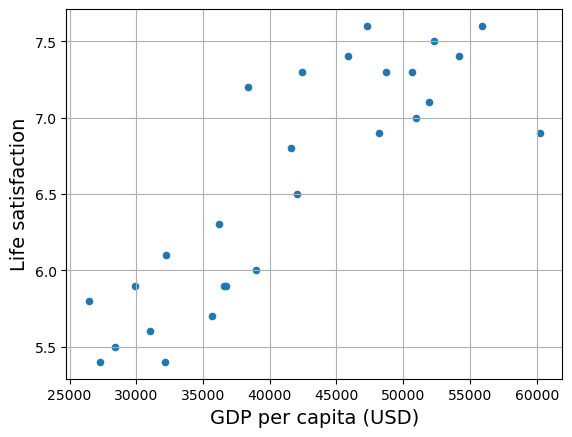

In [16]:
lifesat.plot(kind="scatter", grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.show()

In [17]:
x = lifesat[["GDP per capita (USD)"]]
y = lifesat[["Life satisfaction"]]

model = LinearRegression()
model.fit(x, y)

theta_0 = model.intercept_[0]
theta_1 = model.coef_[0][0]
print(f"theta_0: {theta_0}")
print(f"theta_1: {theta_1}")

theta_0: 3.74904942737691
theta_1: 6.778899694341219e-05


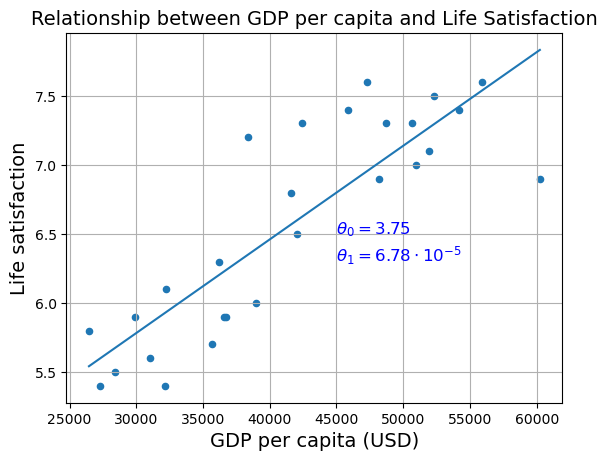

In [18]:
lifesat.plot(kind="scatter", grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.plot(x, theta_0+theta_1*x)
plt.text(45000, 6.5, fr"$\theta_0 = {theta_0.round(2)}$", color="blue")
plt.text(45000, 6.3, fr"$\theta_1 = {theta_1 * 1e5:.2f}\cdot 10^{{-5}}$", color="blue")
plt.title("Relationship between GDP per capita and Life Satisfaction")
plt.show()

In [19]:
cyprus_gdp_per_capita_2020 = (
    gdp_per_capita_2020[gdp_per_capita_2020["Entity"]=="Cyprus"][["GDP per capita (USD)"]]
)
cyprus_gdp_per_capita_2020

,GDP per capita (USD)
1517,37655.18


In [20]:
cyprus_predict_life_satisfaction = model.predict(cyprus_gdp_per_capita_2020)
cyprus_predict_life_satisfaction

array([[6.30165633]])

In [21]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(x, y)
model_knn.predict(cyprus_gdp_per_capita_2020)

array([[6.33333333]])